In [16]:
from  sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [18]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [19]:
print(train.target[5])

3


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Converts raw text (documents, sentences, etc.) into a numerical feature matrix using the TF-IDF (Term Frequency-Inverse Document Frequency)
#Why TF-IDF?
#TF (Term Frequency): Measures how often a word appears in a document.
#IDF (Inverse Document Frequency): Penalizes words that appear too frequently across all documents (e.g., "the", "and") to highlight rare, meaningful terms.
#Together, they create a weighted representation of text data for machine learning.

from sklearn.naive_bayes import MultinomialNB
#A probabilistic classifier based on Naïve Bayes, designed for discrete features (e.g., word counts or TF-IDF scores in text).

from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [21]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

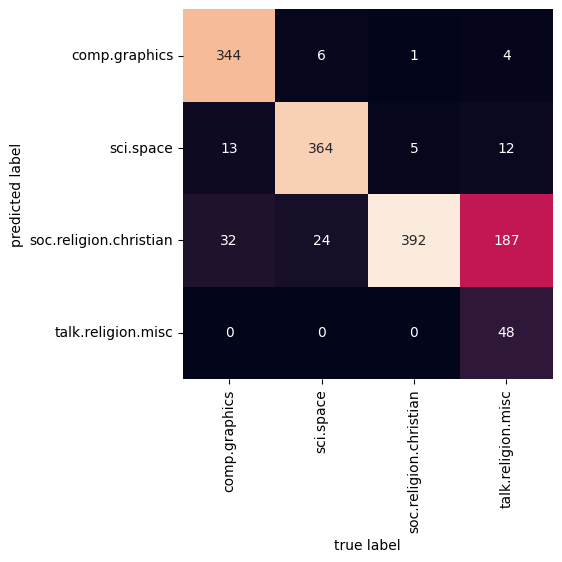

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
def predicted_categorey(s, train= train , model= model):
  pred= model.predict([s])
  return train.target_names[pred[0]]

In [24]:
predicted_categorey('sending a payload to the ISS')

'sci.space'

In [25]:
predicted_categorey('disscussing islam vs atheism')

'soc.religion.christian'

In [26]:
predicted_categorey('determining the screen resolution')

'comp.graphics'